## Complex amplitude distribution (local)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import seaborn as sns
import pandas as pd

In [3]:
# Load data : 
path = '/Users/zcaspar/codes/mit4320/'
ds_cal = xr.merge([xr.open_dataset(path+i+'local_distribution_Cal.nc') for i in ['','SSV_']])
ds_med = xr.merge([xr.open_dataset(path+i+'local_distribution_Med.nc') for i in ['','SSV_']])
ds_atl = xr.merge([xr.open_dataset(path+i+'local_distribution_Atl.nc') for i in ['','SSV_']])
ds_swa = xr.merge([xr.open_dataset(path+i+'local_distribution_Sou.nc') for i in ['','SSV_']])

In [4]:
names = ['California','Mediterranean','Atlantic','South_australia']
ds_mid,ds = {},{}
for _,name in zip([ds_cal,ds_med,ds_atl,ds_swa], names):
    loni_mid = _.lon.size//2
    lati_mid = _.lat.size//2
    ds_mid[name] = _.isel(lon=loni_mid,lat=lati_mid)
    ds[name] = _

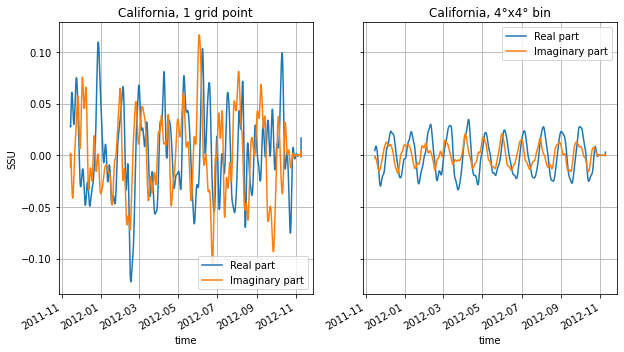

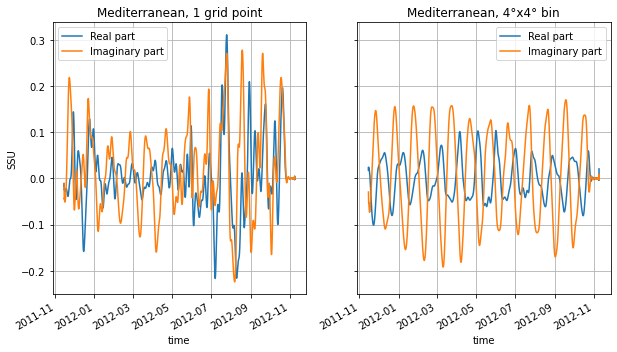

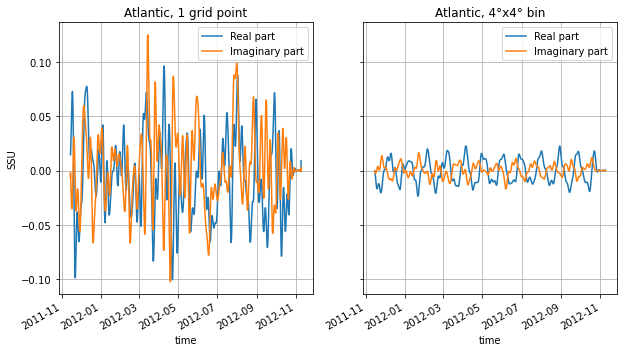

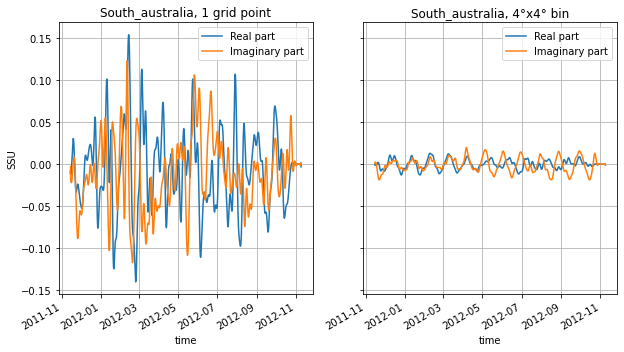

In [5]:
for i,k in enumerate(ds_mid.keys()):
    fig,axs = plt.subplots(1,2,figsize=(10,5),sharey=True)
    ds_mid[k].SSU_rot_demodulated_real.plot(ax=axs[0],label='Real part')
    ds_mid[k].SSU_rot_demodulated_imag.plot(ax=axs[0],label='Imaginary part')
    axs[0].grid();axs[0].set_title(names[i]+', 1 grid point');
    axs[0].legend();axs[0].set_ylabel('SSU');
    
    ds[k].SSU_rot_demodulated_real.mean(['lon','lat']).plot(ax=axs[1],label='Real part')
    ds[k].SSU_rot_demodulated_imag.mean(['lon','lat']).plot(ax=axs[1],label='Imaginary part')
    axs[1].grid();axs[1].set_title(names[i]+', 4°x4° bin');
    axs[1].legend();axs[1].set_ylabel('');

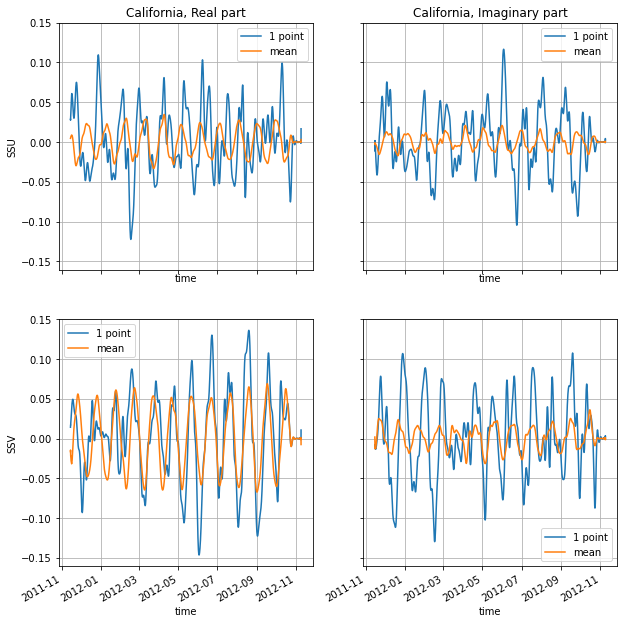

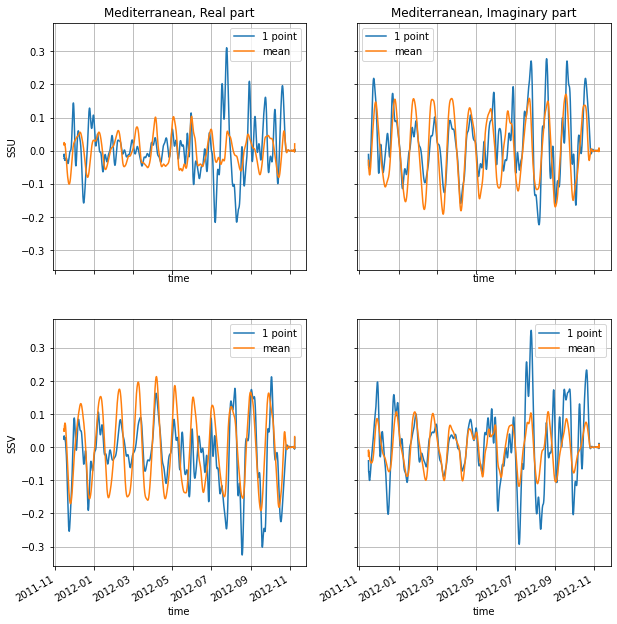

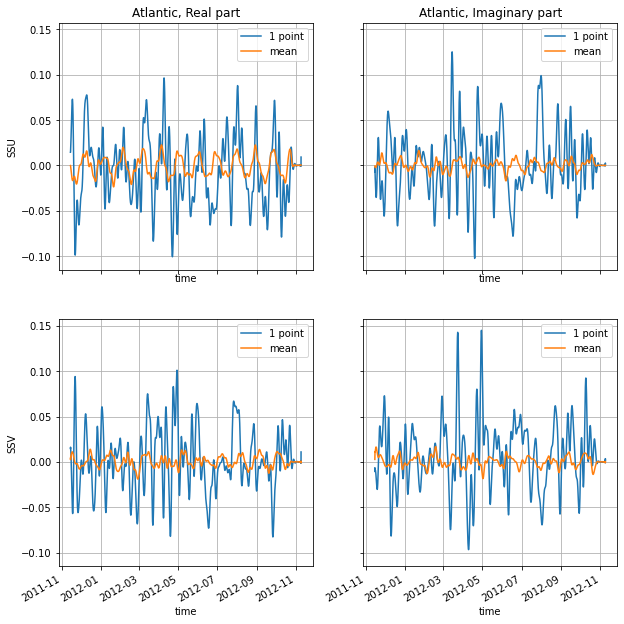

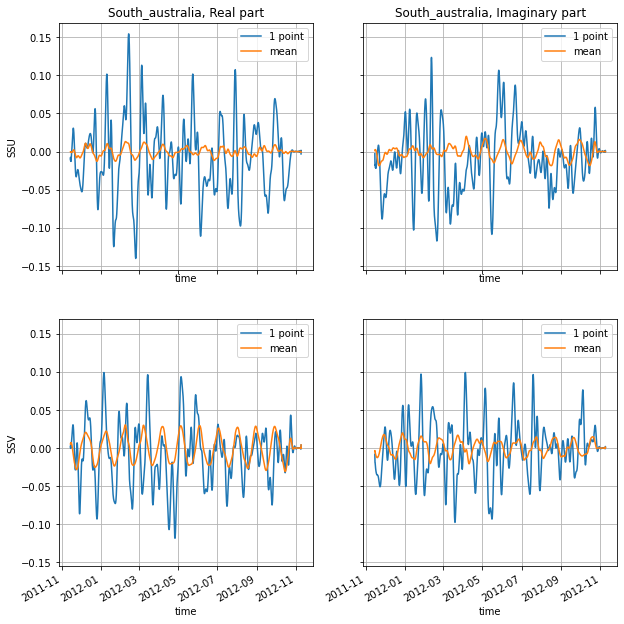

In [6]:
for i,k in enumerate(ds_mid.keys()):
    fig,axs = plt.subplots(2,2,figsize=(10,10),sharey=True,sharex=True)
    ds_mid[k].SSU_rot_demodulated_real.plot(ax=axs[0,0],label='1 point')
    ds_mid[k].SSU_rot_demodulated_imag.plot(ax=axs[0,1],label='1 point')
    
    ds_mid[k].SSV_rot_demodulated_real.plot(ax=axs[1,0],label='1 point')
    ds_mid[k].SSV_rot_demodulated_imag.plot(ax=axs[1,1],label='1 point')
    
    ds[k].SSU_rot_demodulated_real.mean(['lon','lat']).plot(ax=axs[0,0],label='mean')
    ds[k].SSU_rot_demodulated_imag.mean(['lon','lat']).plot(ax=axs[0,1],label='mean')
    
    ds[k].SSV_rot_demodulated_real.mean(['lon','lat']).plot(ax=axs[1,0],label='mean')
    ds[k].SSV_rot_demodulated_imag.mean(['lon','lat']).plot(ax=axs[1,1],label='mean')
    
    axs[0,1].grid();axs[0,1].set_title(names[i]+', Imaginary part');
    axs[0,1].legend();axs[0,1].set_ylabel('');
    axs[0,0].grid();axs[0,0].set_title(names[i]+', Real part');
    axs[0,0].legend();axs[0,0].set_ylabel('SSU');
    
    axs[1,1].grid();axs[1,0].grid();
    axs[1,1].legend();axs[1,1].set_ylabel('');
    axs[1,0].legend();axs[1,0].set_ylabel('SSV');

### PDFs

In [7]:
def gaussian(x,sigma,mu):
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*sigma**2))

In [8]:
def plot_joint_th(ds,myfunc,sigma,mu):
    g = sns.JointGrid(data=ds,#
                      x="SSU_rot_demodulated_real",
                      y="SSU_rot_demodulated_imag")
    ax= g.plot_joint(sns.histplot,kde = False,stat='density')
    x0, x1 = ax.x.min(),ax.x.max()  # extract the endpoints for the x-axis
    x_pdf = np.linspace(x0, x1, 50)
    y_pdf = myfunc(x_pdf,sigma[0],mu[0])
    g.ax_marg_x.plot(x_pdf,y_pdf,c='k')
    g.plot_marginals(sns.histplot, kde=True,stat='density')

    y0, y1 = ax.y.min(),ax.y.max()  # extract the endpoints for the x-axis
    x_pdf = np.linspace(y0, y1, 50)
    y_pdf = myfunc(x_pdf,sigma[1],mu[1])
    g.ax_marg_y.plot(y_pdf,x_pdf,c='k')
    g.plot_marginals(sns.histplot, kde=True,stat='density')
    

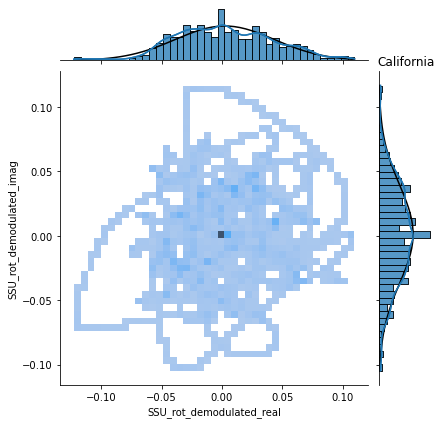

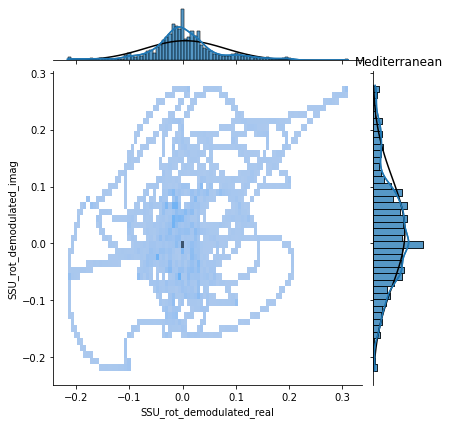

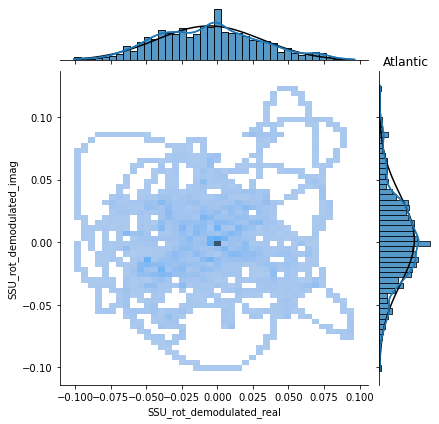

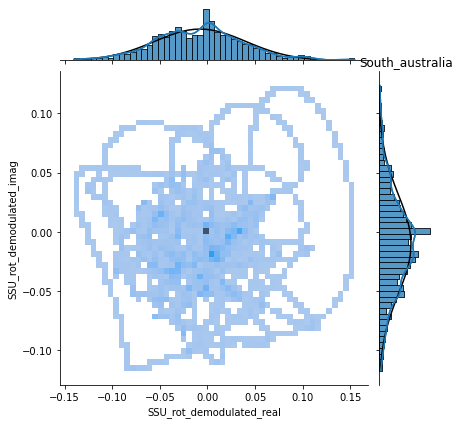

In [9]:
for i,k in enumerate(ds_mid.keys()):
    std_real,mean_real = ds_mid[k].SSU_rot_demodulated_real.std().values,ds_mid[k].SSU_rot_demodulated_real.mean().values
    std_imag,mean_imag = ds_mid[k].SSU_rot_demodulated_imag.std().values,ds_mid[k].SSU_rot_demodulated_imag.mean().values
    plot_joint_th(ds_mid[k],gaussian,[std_real,std_imag],[mean_real,mean_imag])
    plt.title(names[i])

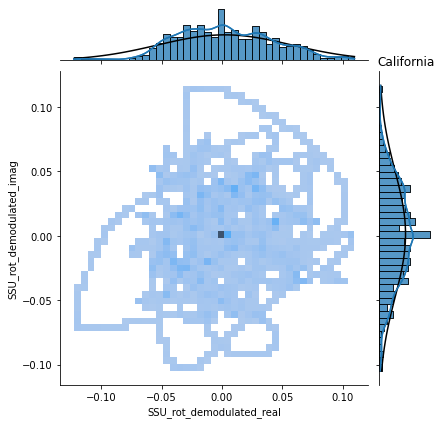

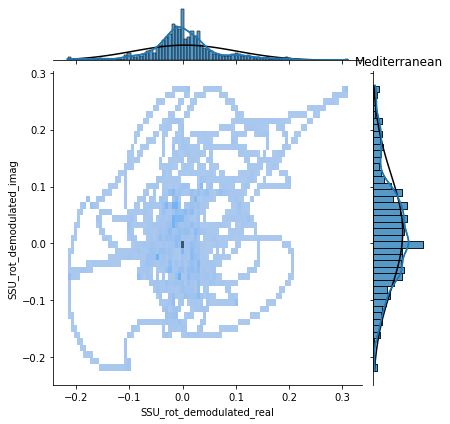

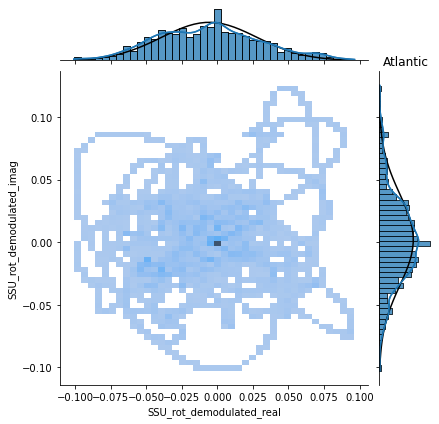

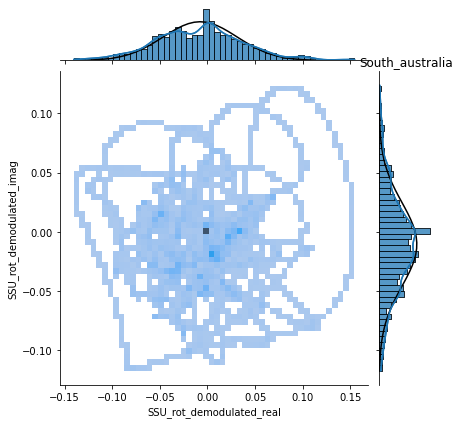

In [10]:
for i,k in enumerate(ds_mid.keys()):
    std_real,mean_real = ds_mid[k].SSV_rot_demodulated_real.std().values,ds_mid[k].SSU_rot_demodulated_real.mean().values
    std_imag,mean_imag = ds_mid[k].SSV_rot_demodulated_imag.std().values,ds_mid[k].SSU_rot_demodulated_imag.mean().values
    plot_joint_th(ds_mid[k],gaussian,[std_real,std_imag],[mean_real,mean_imag])
    plt.title(names[i])

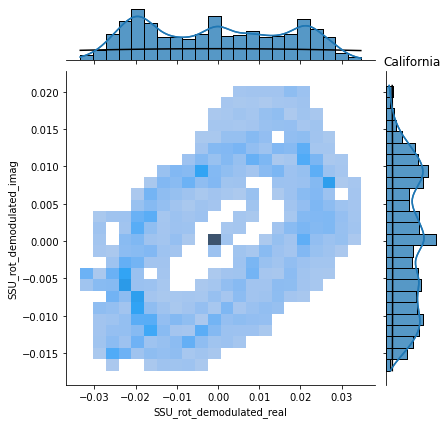

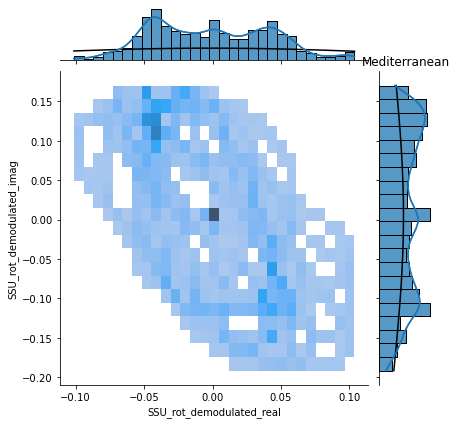

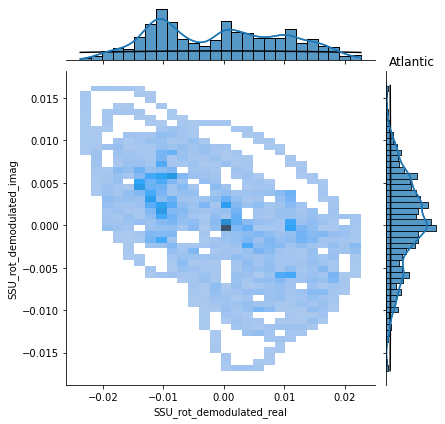

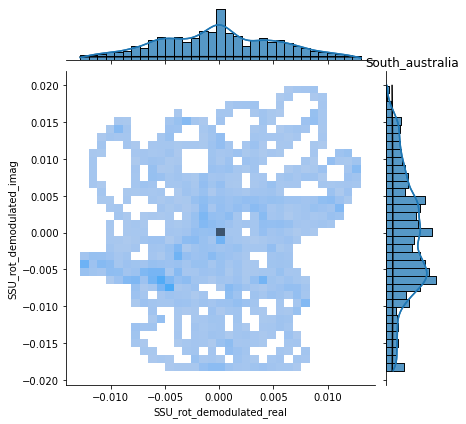

In [11]:
for i,k in enumerate(ds_mid.keys()):
    std_real,mean_real = ds[k].SSU_rot_demodulated_real.std().values,ds[k].SSU_rot_demodulated_real.mean().values
    std_imag,mean_imag = ds[k].SSU_rot_demodulated_imag.std().values,ds[k].SSU_rot_demodulated_imag.mean().values
    plot_joint_th(ds[k].mean(['lon','lat']),gaussian,[std_real,std_imag],[mean_real,mean_imag])
    plt.title(names[i])

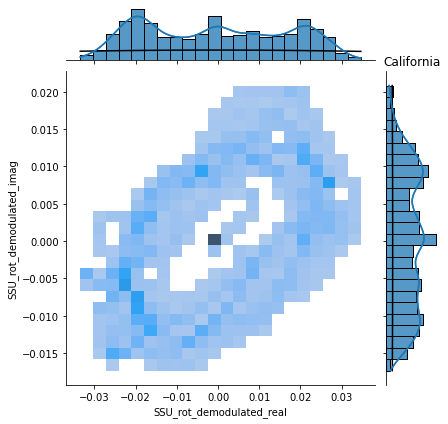

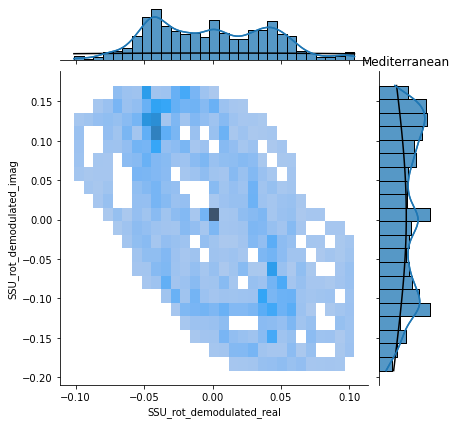

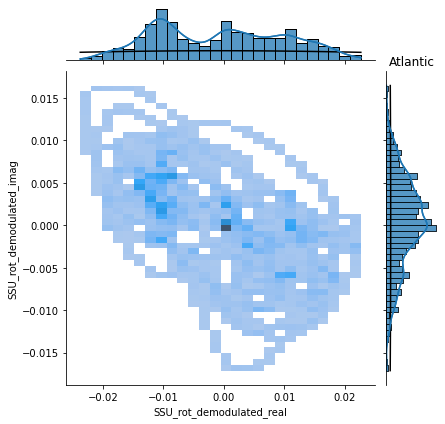

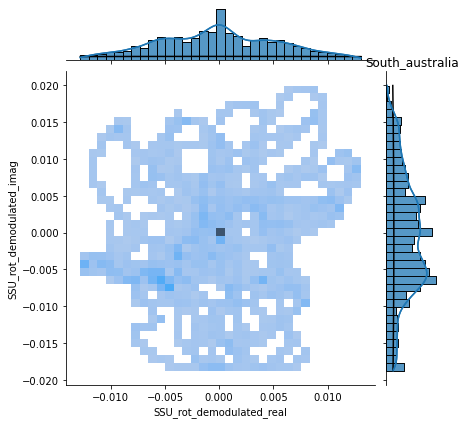

In [12]:
for i,k in enumerate(ds_mid.keys()):
    std_real,mean_real = ds[k].SSV_rot_demodulated_real.std().values,ds[k].SSU_rot_demodulated_real.mean().values
    std_imag,mean_imag = ds[k].SSV_rot_demodulated_imag.std().values,ds[k].SSU_rot_demodulated_imag.mean().values
    plot_joint_th(ds[k].mean(['lon','lat']),gaussian,[std_real,std_imag],[mean_real,mean_imag])
    plt.title(names[i])

### Supplementary figures

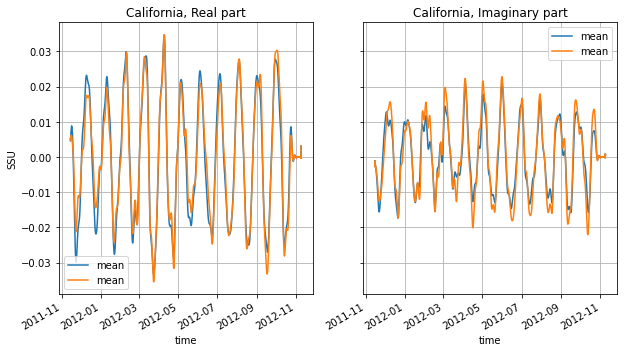

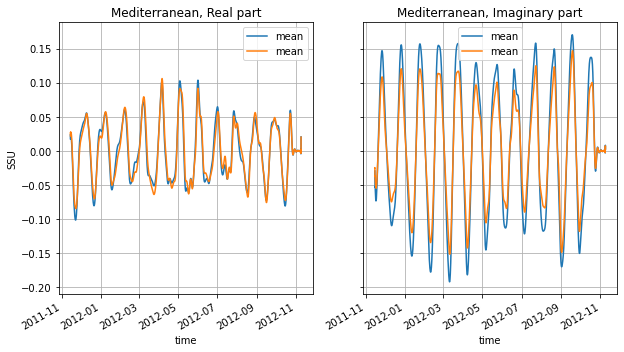

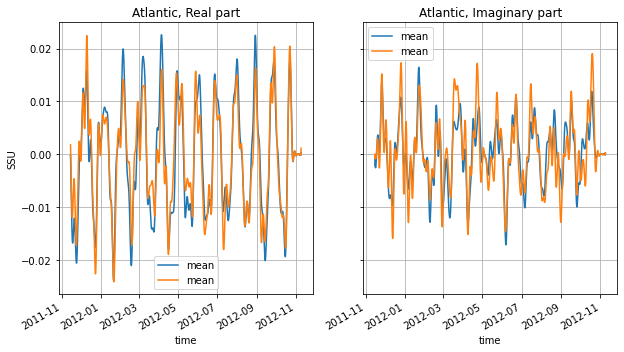

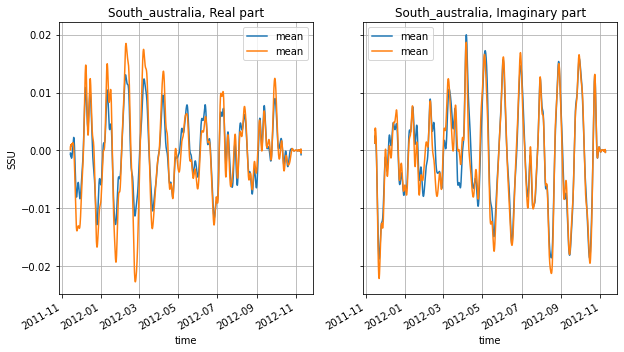

In [13]:
for i,k in enumerate(ds_mid.keys()):
    fig,axs = plt.subplots(1,2,figsize=(10,5),sharey=True)
    
    ds[k].SSU_rot_demodulated_real.mean(['lon','lat']).plot(ax=axs[0],label='mean')
    ds[k].SSU_rot_demodulated_imag.mean(['lon','lat']).plot(ax=axs[1],label='mean')
    
    ds[k].SSU_rot_demodulated_real.sel(lon=slice(ds[k].lon[loni_mid]-1,ds[k].lon[loni_mid]+1),
                                       lat=slice(ds[k].lat[lati_mid]-1,ds[k].lat[lati_mid]+1)
                                      ).mean(['lon','lat']).plot(ax=axs[0],label='mean')
    ds[k].SSU_rot_demodulated_imag.sel(lon=slice(ds[k].lon[loni_mid]-1,ds[k].lon[loni_mid]+1),
                                       lat=slice(ds[k].lat[lati_mid]-1,ds[k].lat[lati_mid]+1)
                                      ).mean(['lon','lat']).plot(ax=axs[1],label='mean')
    axs[1].grid();axs[1].set_title(names[i]+', Imaginary part');
    axs[1].legend();axs[1].set_ylabel('');
    axs[0].grid();axs[0].set_title(names[i]+', Real part');
    axs[0].legend();axs[0].set_ylabel('SSU');

## Tidal variance

In [14]:
#Load data : 
dsU = xr.open_dataset(path+'energy_SSU_binned_dl1.0.nc')
dsV = xr.open_dataset(path+'energy_SSV_binned_dl1.0.nc')
ds_hf = xr.open_dataset(path+'energy_hf_binned_dl1.0.nc')

In [15]:
ds_hf = xr.merge([dsU,dsV,ds_hf])

In [16]:
import cartopy.crs as ccrs
def plot_maps(ds,colmap='RdBu_r',vlim=(-0.01,0.01),axes=111):
    
    crs = ccrs.Robinson()
    #fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(axes,projection=crs)
    ds.plot(vmax=vlim[1],vmin=vlim[0],y='lat_bin',ax=ax,
            transform=ccrs.PlateCarree(),cmap=colmap,label=False,
           cbar_kwargs={'fraction':0.02})
    ax.gridlines(draw_labels=True)
    return fig,ax

Text(0.5, 1.0, 'Energy ratio (1°x1° bins)')

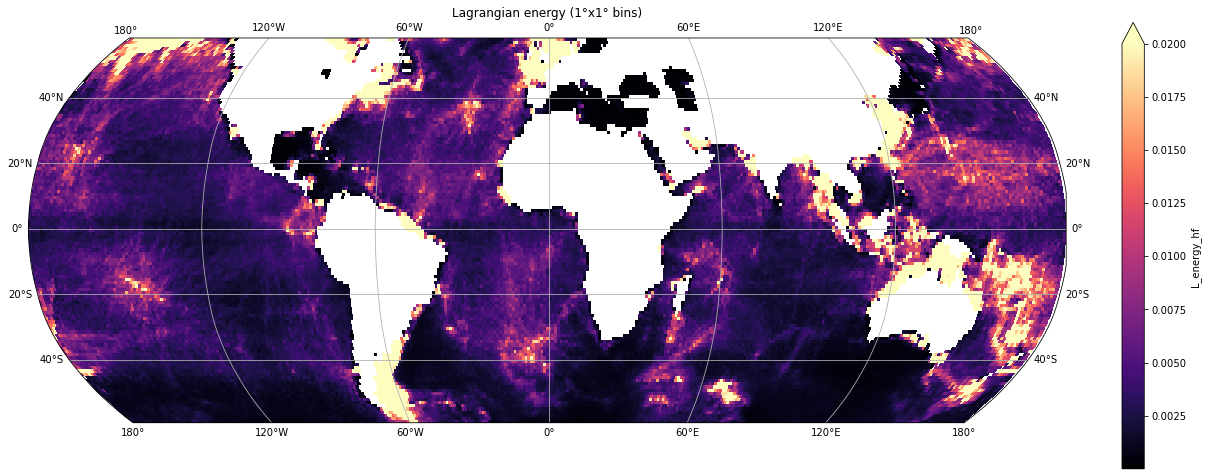

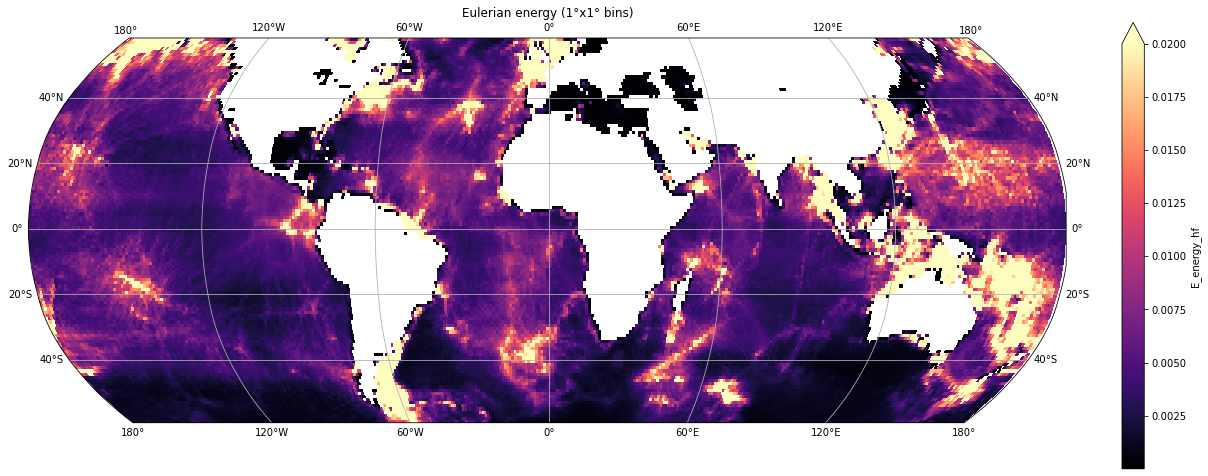

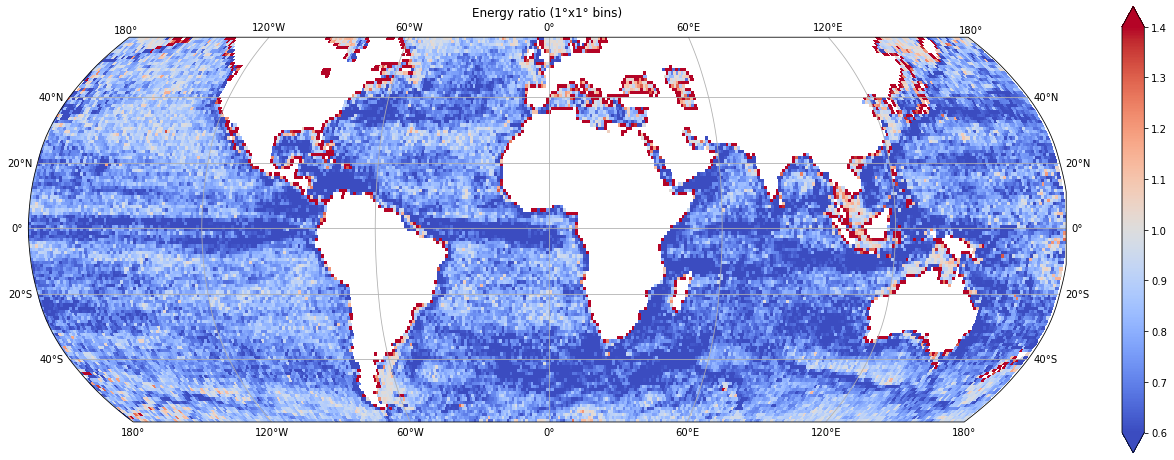

In [17]:
figsize = (20,20)
fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(ds_hf.L_energy_hf,colmap='magma',vlim=(None,0.02))
ax.set_title('Lagrangian energy (1°x1° bins)')

figsize = (20,20)
fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(ds_hf.E_energy_hf,colmap='magma',vlim=(None,0.02))
ax.set_title('Eulerian energy (1°x1° bins)')

figsize = (20,20)
fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(ds_hf.L_energy_hf/ds_hf.E_energy_hf,colmap='coolwarm',vlim=(0.6,1.4))
ax.set_title('Energy ratio (1°x1° bins)')

Text(0.5, 1.0, 'Energy ratio (SSU, 1°x1° bins)')

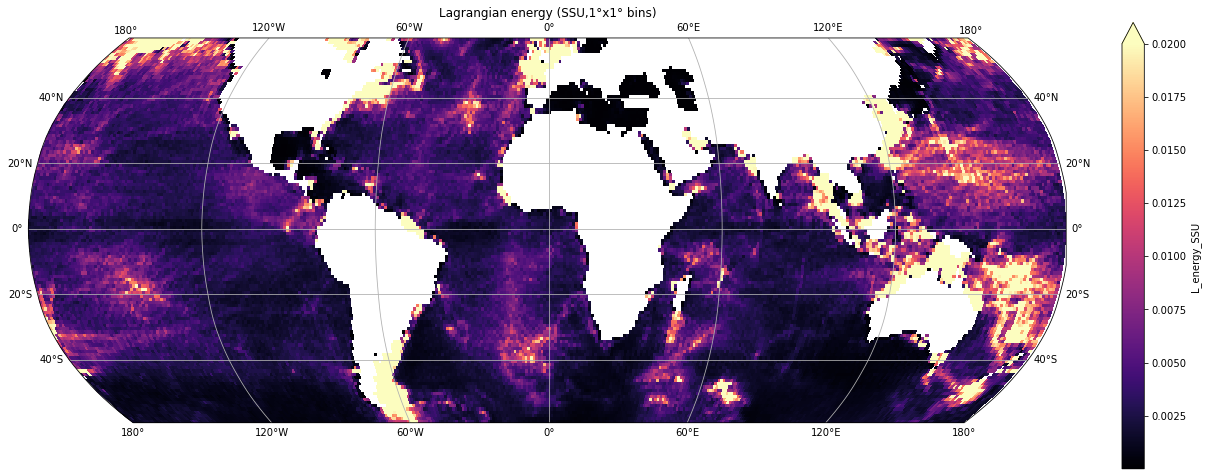

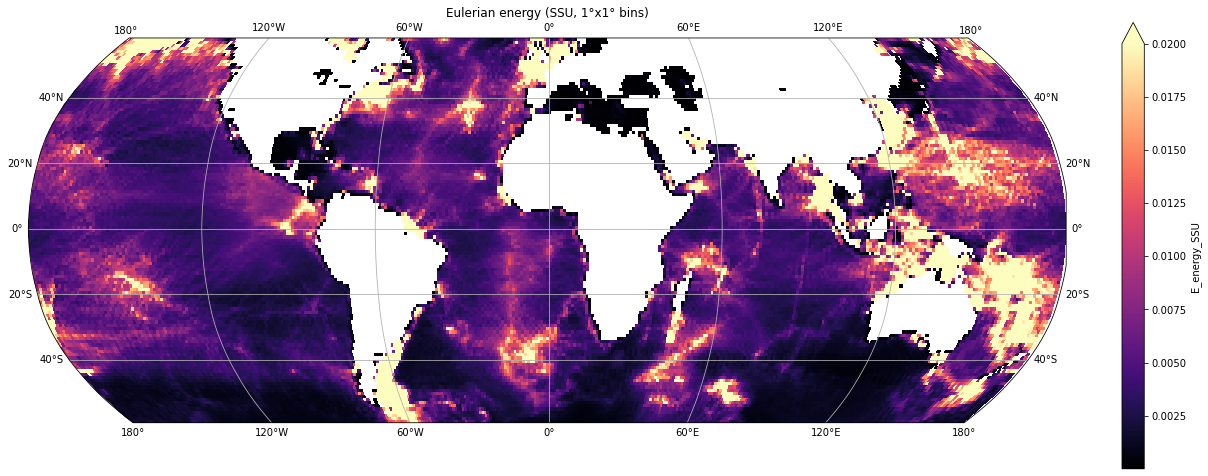

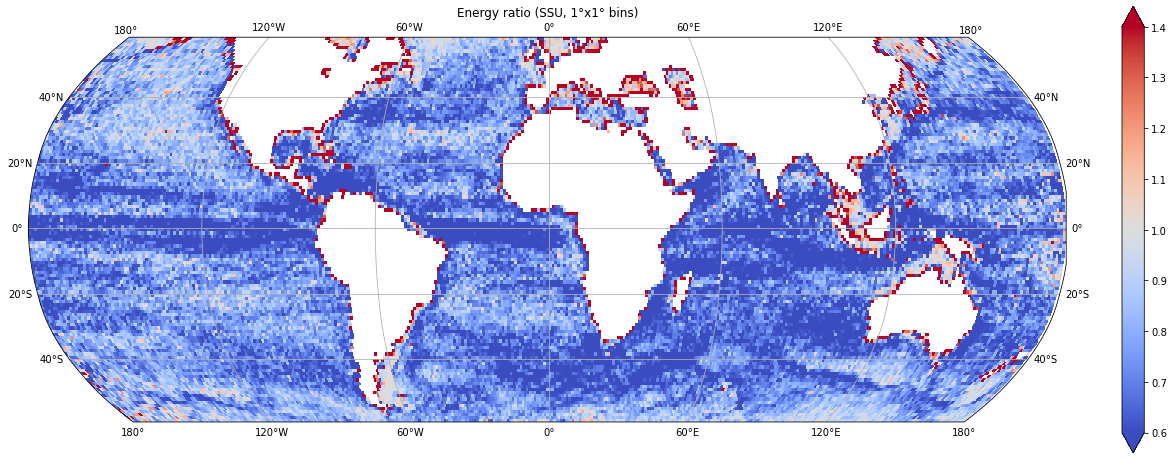

In [18]:
figsize = (20,20)
fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(ds_hf.L_energy_SSU,colmap='magma',vlim=(None,0.02))
ax.set_title('Lagrangian energy (SSU,1°x1° bins)')

figsize = (20,20)
fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(ds_hf.E_energy_SSU,colmap='magma',vlim=(None,0.02))
ax.set_title('Eulerian energy (SSU, 1°x1° bins)')

figsize = (20,20)
fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(ds_hf.L_energy_SSU/ds_hf.E_energy_SSU,colmap='coolwarm',vlim=(0.6,1.4))
ax.set_title('Energy ratio (SSU, 1°x1° bins)')

Text(0.5, 1.0, 'Energy ratio (SSV, 1°x1° bins)')

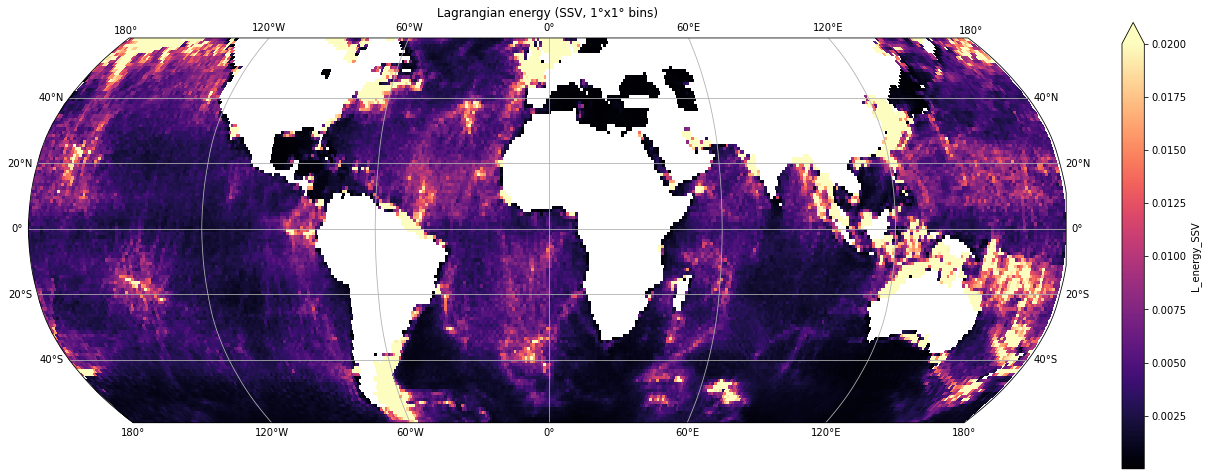

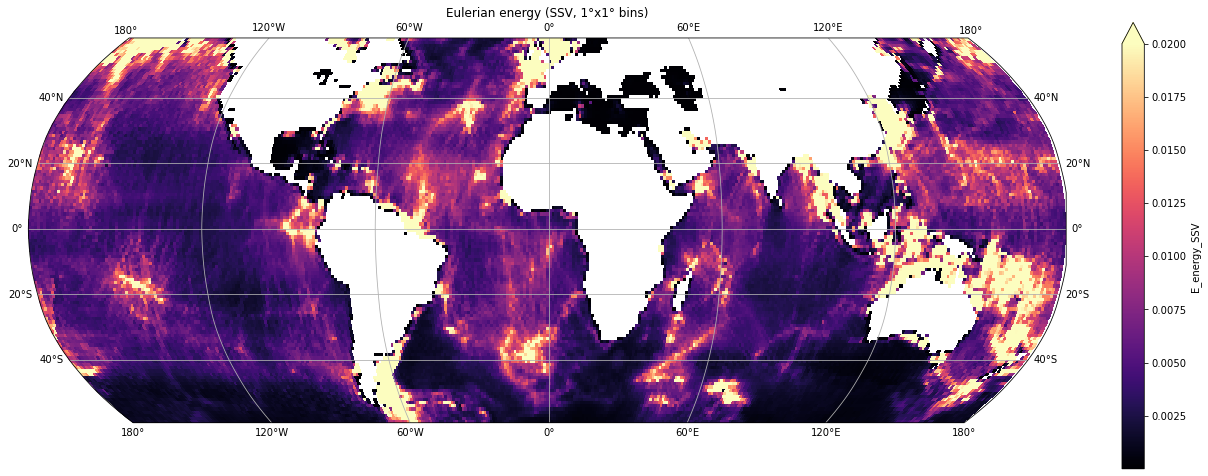

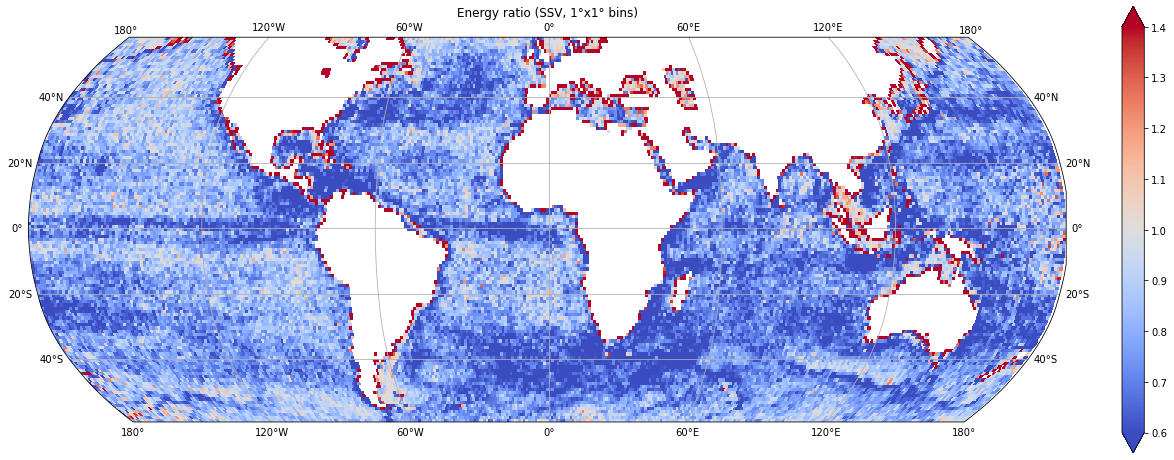

In [19]:
figsize = (20,20)
fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(ds_hf.L_energy_SSV,colmap='magma',vlim=(None,0.02))
ax.set_title('Lagrangian energy (SSV, 1°x1° bins)')

figsize = (20,20)
fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(ds_hf.E_energy_SSV,colmap='magma',vlim=(None,0.02))
ax.set_title('Eulerian energy (SSV, 1°x1° bins)')

figsize = (20,20)
fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(ds_hf.L_energy_SSV/ds_hf.E_energy_SSV,colmap='coolwarm',vlim=(0.6,1.4))
ax.set_title('Energy ratio (SSV, 1°x1° bins)')

#### Eulerian versus Lagrangian discrepancies (SSU and SSV)

Text(0.5, 1.0, 'Energy ratio (1°x1° bins)')

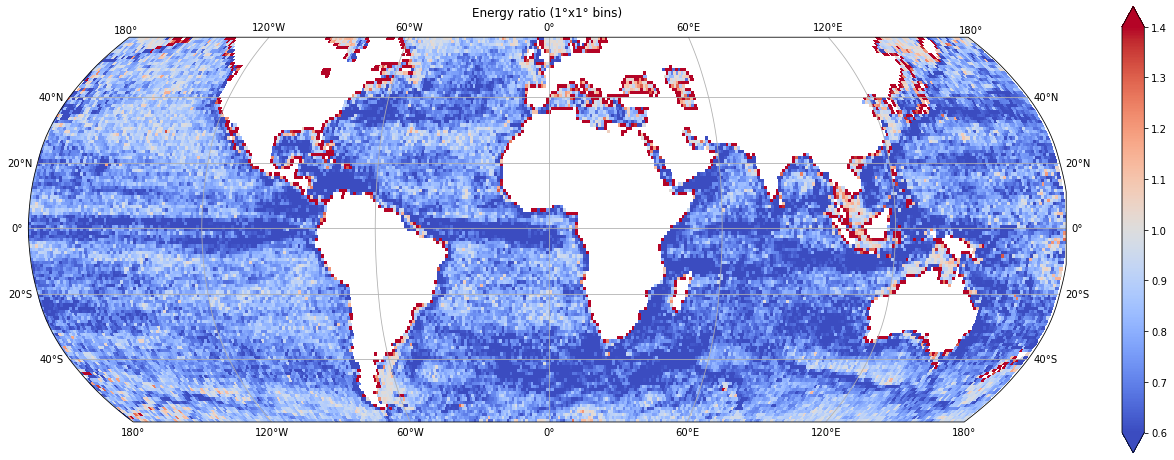

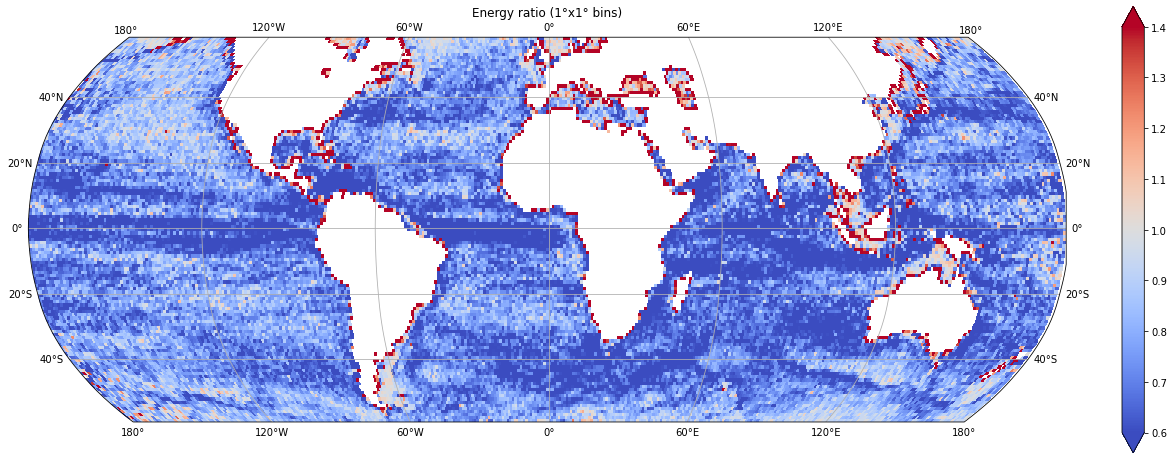

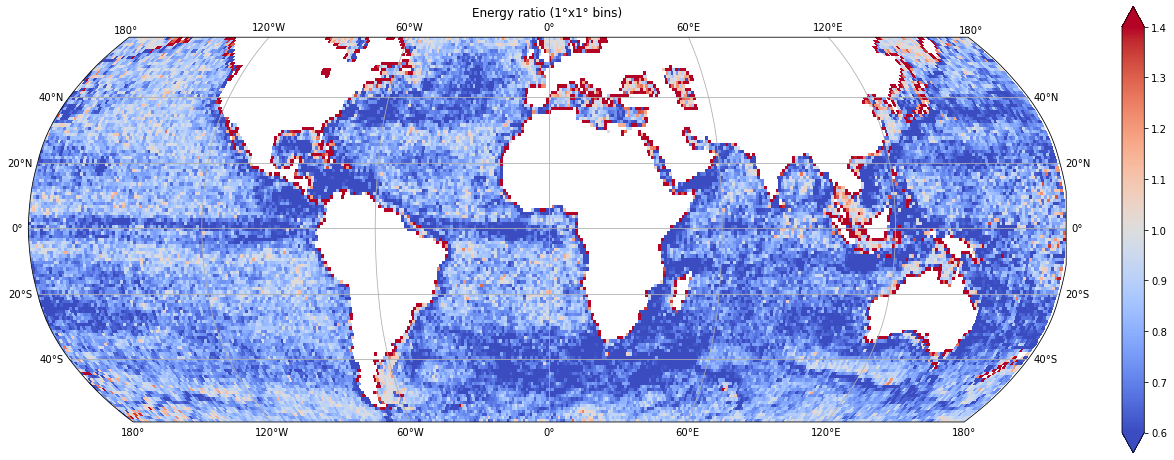

In [20]:
figsize = (20,20)
fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(ds_hf.L_energy_hf/ds_hf.E_energy_hf,colmap='coolwarm',vlim=(0.6,1.4))
ax.set_title('Energy ratio (1°x1° bins)')


figsize = (20,20)
fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(ds_hf.L_energy_SSU/ds_hf.E_energy_SSU,colmap='coolwarm',vlim=(0.6,1.4))
ax.set_title('Energy ratio (1°x1° bins)')

figsize = (20,20)
fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(ds_hf.L_energy_SSV/ds_hf.E_energy_SSV,colmap='coolwarm',vlim=(0.6,1.4))
ax.set_title('Energy ratio (1°x1° bins)')

#### Zoom

In [21]:
lonmin,lonmax = ds['Atlantic'].lon.min().values, ds['Atlantic'].lon.max().values
latmin,latmax = ds['Atlantic'].lat.min().values, ds['Atlantic'].lat.max().values

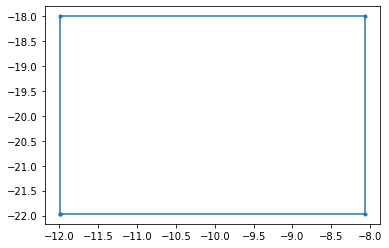

In [22]:
plt.plot([lonmin,lonmin,lonmax,lonmax,lonmin],[latmin,latmax,latmax,latmin,latmin],marker='.')

In [23]:
lonmin,lonmax,latmin,latmax = -140,-130,-18,-1 

Text(0.5, 1.0, 'Eulerian energy (SSV, 1°x1° bins)')

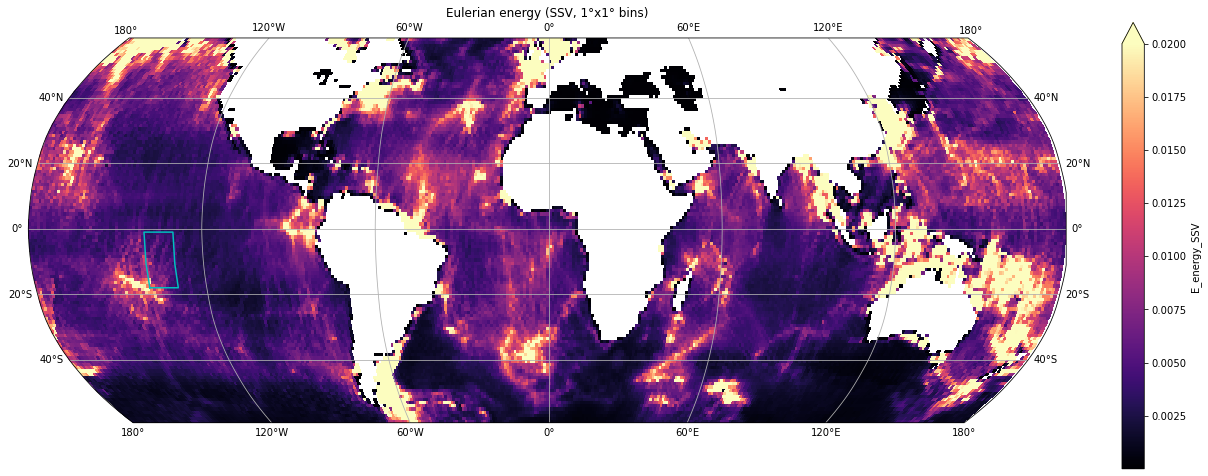

In [24]:
figsize = (20,20)
fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(ds_hf.E_energy_SSV,colmap='magma',vlim=(None,0.02))
ax.plot([lonmin,lonmin,lonmax,lonmax,lonmin],[latmin,latmax,latmax,latmin,latmin],transform=ccrs.PlateCarree(),c='c')
ax.set_title('Eulerian energy (SSV, 1°x1° bins)')

In [25]:
for i,k in enumerate(ds_mid.keys()):
    ds[names[i]]['SSU_rot_demodulated'] = ds[names[i]].SSU_rot_demodulated_real+1j*ds[names[i]].SSU_rot_demodulated_imag
    ds_mid[names[i]]['SSU_rot_demodulated'] = ds_mid[names[i]].SSU_rot_demodulated_real+1j*ds_mid[names[i]].SSU_rot_demodulated_imag
    ds[names[i]]['SSV_rot_demodulated'] = ds[names[i]].SSV_rot_demodulated_real+1j*ds[names[i]].SSV_rot_demodulated_imag
    ds_mid[names[i]]['SSV_rot_demodulated'] = ds_mid[names[i]].SSV_rot_demodulated_real+1j*ds_mid[names[i]].SSV_rot_demodulated_imag

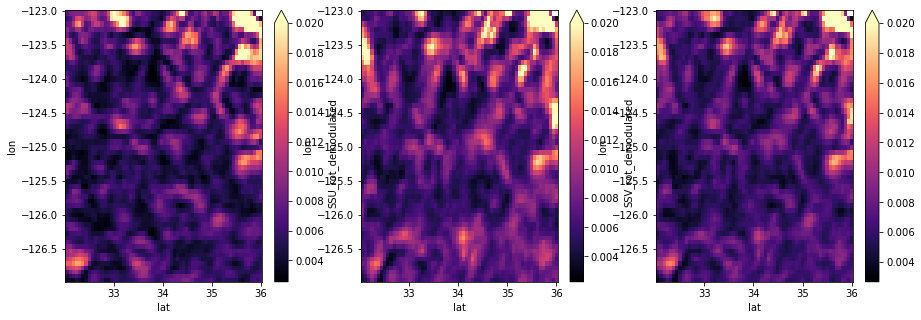

In [26]:
region = 'California'
fig,axes = plt.subplots(1,3,figsize=(15,5))
(np.abs(ds[region].SSU_rot_demodulated)**2).mean('time').plot(vmax=0.02,ax=axes[0],cmap='magma')
(np.abs(ds[region].SSV_rot_demodulated)**2).mean('time').plot(vmax=0.02,ax=axes[1],cmap='magma')
(0.5*(np.abs(ds[region].SSU_rot_demodulated)**2+np.abs(ds[region].SSV_rot_demodulated)**2)
).mean('time').plot(vmax=0.02,ax=axes[2],cmap='magma')

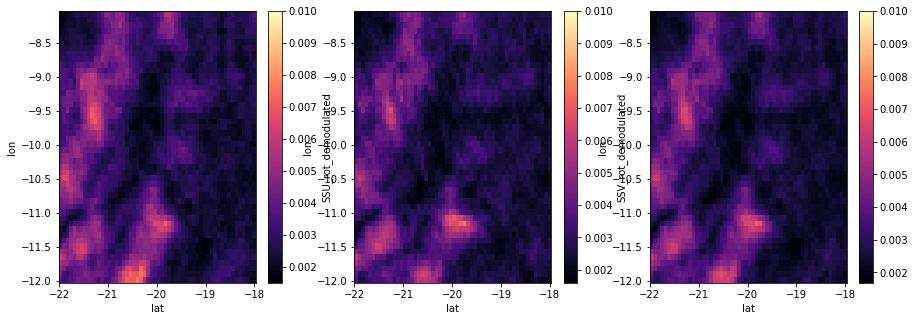

In [27]:
region = 'Atlantic'
fig,axes = plt.subplots(1,3,figsize=(15,5))
(np.abs(ds[region].SSU_rot_demodulated)**2).mean('time').plot(vmax=0.01,ax=axes[0],cmap='magma')
(np.abs(ds[region].SSV_rot_demodulated)**2).mean('time').plot(vmax=0.01,ax=axes[1],cmap='magma')
(0.5*(np.abs(ds[region].SSU_rot_demodulated)**2+np.abs(ds[region].SSV_rot_demodulated)**2)
).mean('time').plot(vmax=0.01,ax=axes[2],cmap='magma')

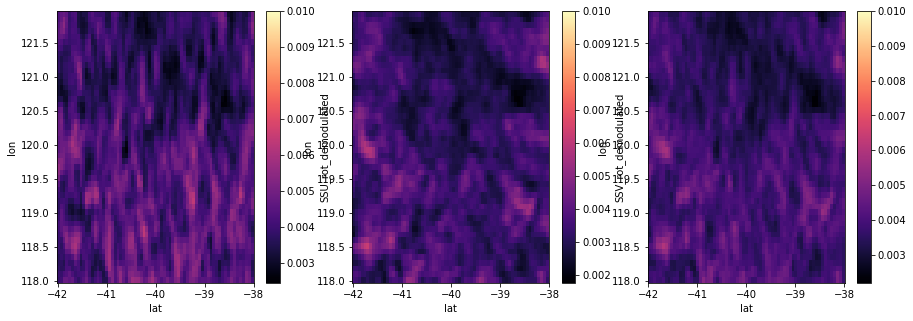

In [28]:
region = 'South_australia'
fig,axes = plt.subplots(1,3,figsize=(15,5))
(np.abs(ds[region].SSU_rot_demodulated)**2).mean('time').plot(vmax=0.01,ax=axes[0],cmap='magma')
(np.abs(ds[region].SSV_rot_demodulated)**2).mean('time').plot(vmax=0.01,ax=axes[1],cmap='magma')
(0.5*(np.abs(ds[region].SSU_rot_demodulated)**2+np.abs(ds[region].SSV_rot_demodulated)**2)
).mean('time').plot(vmax=0.01,ax=axes[2],cmap='magma')